# Question 1

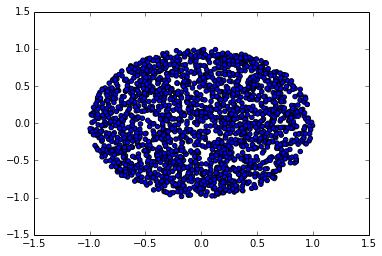

In [4]:
%matplotlib inline
import math
import random
import matplotlib.pyplot as plt

N=2000
xr=[]
yr=[]
for i in range(N):
    theta=random.random()
    theta*=2*math.pi
    r=random.random()
    r=math.sqrt(r)
    xr.append(r*math.cos(theta))
    yr.append(r*math.sin(theta))

plt.scatter(xr,yr)
plt.show()

# Question 2

acceptance rate p=1.5: 0.8835


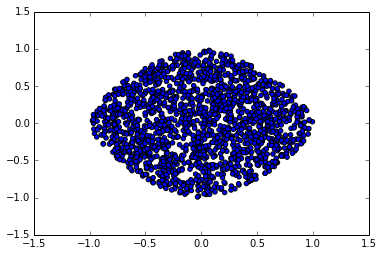

acceptance rate p=0.7: 0.388


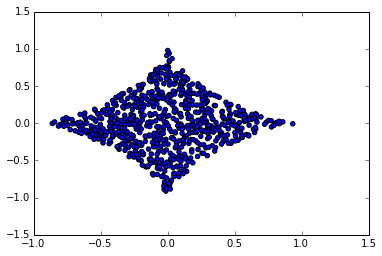

In [10]:
%matplotlib inline
import random
import math
import matplotlib.pyplot as plt

N=2000
xr=[]
yr=[]
totalnum=0
accepted=0.0
p=1.5
#p=0.7

for i in range(N):
    theta=random.random()
    theta*=2*math.pi
    r=random.random()
    r=math.sqrt(r)
    totalnum+=1
    x=r*math.cos(theta)
    y=r*math.sin(theta)
    if((math.fabs(x)**p+math.fabs(y)**p)**(1.0/p)<=1.000000):
        xr.append(r*math.cos(theta))
        yr.append(r*math.sin(theta))
        accepted+=1

print "acceptance rate p=1.5:",accepted/totalnum
plt.scatter(xr,yr)
plt.show()

xr=[]
yr=[]
p=0.7

accepted=0.0
totalnum=0

for i in range(N):
    theta=random.random()
    theta*=2*math.pi
    r=random.random()
    r=math.sqrt(r)
    totalnum+=1
    x=r*math.cos(theta)
    y=r*math.sin(theta)
    if((math.fabs(x)**p+math.fabs(y)**p)**(1.0/p)<=1.000000):
        xr.append(r*math.cos(theta))
        yr.append(r*math.sin(theta))
        accepted+=1

print "acceptance rate p=0.7:",accepted/totalnum
plt.scatter(xr,yr)
plt.show()

We can shift the axis by 45 degrees, and use the smallest rectangle covering the 0.7-norm ball as proposal, it will definitely work better than 2-norm ball because 2-norm ball is bigger than the enclosing smallest rectangle.

# Bonus Question

$V_n(r) = \frac{\pi^{n/2}}{\Gamma\left(\frac{n}{2}+1\right)}r^n$

$F(r) = V_n(r) / V_n(1)$

$= \frac{\frac{\pi^{n/2}}{\Gamma\left(\frac{n}{2}+1\right)}r^n}{\frac{\pi^{n/2}}{\Gamma\left(\frac{n}{2}+1\right)}1^n}$

$=r^n$

$u=F(r)=r^n$ so $r=\sqrt[n]{u}$

where u is uniformly distributed between 0 and 1

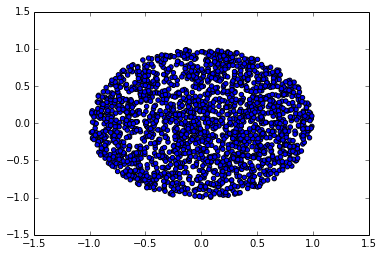

In [13]:
%matplotlib inline

import random
import math
import matplotlib.pyplot as plt
import numpy as np

N=2000
xr=[]
yr=[]

n=2#n-sphere

mean=[0 for xvs in range(n)]
cov=[[0 for xvs in range(n)] for xvq in range(n)]
for i in range(n):
    cov[i][i]=1

def normalize(a):
    suma=0
    for i in range(len(a)):
	suma+=a[i]*a[i]
    suma=math.sqrt(suma)
    for i in range(len(a)):
	a[i]/=suma
    return a

xr=[]
yr=[]

for i in range(N):
    theta=np.random.multivariate_normal(mean,cov)
    theta=normalize(theta)
    r=random.random()
    r=r**(1./n)
    #print "vector:",theta,"length:",r,"point:",theta*r #open if you are not going to use n=2
    xr.append((theta*r)[0])#close if you are not going to use n=2
    yr.append((theta*r)[1])#close if you are not going to use n=2

plt.scatter(xr,yr)
plt.show()


If we use rejection sampling, with increasing dimension the acceptance rate will drop.

Volume of the n-cube is constant 1 so the acceptance ratio is $V_n(r)/1$. Thus acceptance ratio will become:

$\frac{\pi^{n/2}}{\Gamma\left(\frac{n}{2}+1\right)}r^n$

In [7]:
import math

def f(n,r):
    return math.pi**(n/2.0)/math.gamma(n/2.0+1)*(r**n)

for i in range(1,20):
    print "acceptance ratio when n=",i," and r=0.5 is",f(i,0.5)

acceptance ratio when n= 1  and r=0.5 is 1.0
acceptance ratio when n= 2  and r=0.5 is 0.785398163397
acceptance ratio when n= 3  and r=0.5 is 0.523598775598
acceptance ratio when n= 4  and r=0.5 is 0.308425137534
acceptance ratio when n= 5  and r=0.5 is 0.164493406685
acceptance ratio when n= 6  and r=0.5 is 0.0807455121883
acceptance ratio when n= 7  and r=0.5 is 0.0369122341432
acceptance ratio when n= 8  and r=0.5 is 0.0158543442438
acceptance ratio when n= 9  and r=0.5 is 0.00644240020066
acceptance ratio when n= 10  and r=0.5 is 0.00249039457019
acceptance ratio when n= 11  and r=0.5 is 0.000919972597358
acceptance ratio when n= 12  and r=0.5 is 0.000325991886927
acceptance ratio when n= 13  and r=0.5 is 0.000111160736668
acceptance ratio when n= 14  and r=0.5 is 3.65762041822e-05
acceptance ratio when n= 15  and r=0.5 is 1.16407251228e-05
acceptance ratio when n= 16  and r=0.5 is 3.59086044859e-06
acceptance ratio when n= 17  and r=0.5 is 1.07560048612e-06
acceptance ratio when n

As it is seen in the results, the function rapidly decreases as the n increases due to the fact that 0<=r<=1.